In [1]:
import pandas as pd 
import numpy as np 

In [51]:
census = pd.read_csv("nyc_census_tracts.csv")
loc = pd.read_csv("census_block_loc.csv")

In [52]:
census.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [53]:
census.columns

Index(['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [54]:
loc.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [55]:
tract = []
for i in list(loc["BlockCode"]): 
    tract.append(str(i)[:-4])
    
loc["Tract"] = tract
unique_tracts = list(loc["Tract"].unique())
tract_coord = {i:[] for i in unique_tracts}


possible = []
for i in range(len(unique_tracts)): 
    sub = loc[loc["Tract"] == unique_tracts[i]]
    c1 = list(sub["Latitude"])
    c2 = list(sub["Longitude"])
    coordinates = list(zip(c2, c1))
    tract_coord[unique_tracts[i]] = coordinates



In [56]:
census_latlong = []
for i in list(census["CensusTract"]): 
    try:
        possible = tract_coord[str(i)]
    except: 
        possible = tract_coord[str(36005000100)]
    choice1 = np.random.randint(len(possible))
    choice = possible[choice1]
    census_latlong.append(choice)

In [57]:
census["LatLong"] = census_latlong
lats = []; longs = []
for i in list(census["LatLong"]):
    lats.append(i[1])
    longs.append(i[0])
    
census["Latitude"] = lats
census["Longitude"] = longs

In [70]:
majority = []

for i in range(len(census["Hispanic"])): 
    sublst = [list(census["Hispanic"])[i], list(census["White"])[i], list(census["Black"])[i], list(census["Native"])[i], list(census["Asian"])[i]]
    majority.append(np.argmax(sublst))



In [72]:
census["Majority"] = majority

In [73]:
from collections import Counter
Counter(majority)

Counter({2: 527, 0: 572, 1: 861, 4: 207})

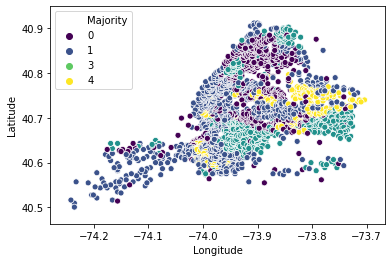

In [79]:
sea.scatterplot(x = "Longitude", y = "Latitude", data = census, hue = "Majority", palette = "viridis")


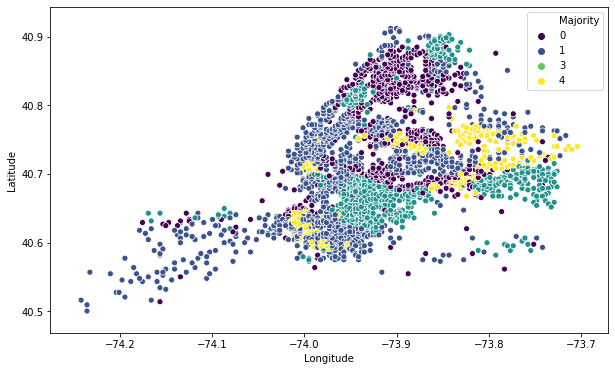

In [82]:
import seaborn as sea # for plot styling
import matplotlib.pyplot as plt 
plt.figure(figsize = (10,6))
sea.scatterplot(x = "Longitude", y = "Latitude", data = census, hue = "Majority", palette = "viridis")


#plt.scatter(lats, longs, c = majority)
#plt.legend()

In [62]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [63]:
X = np.array([[census["Longitude"][i], census["Latitude"][i]] for i in range(len(census["Latitude"]))])

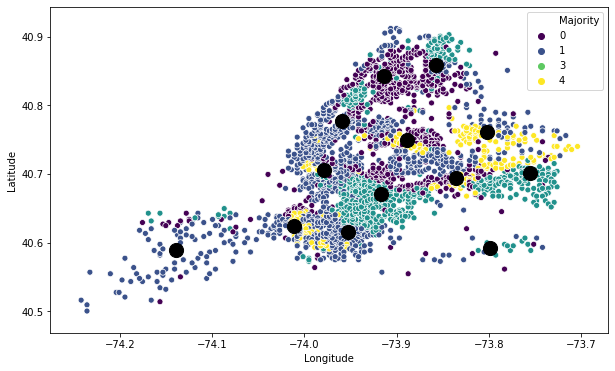

In [83]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize = (10,6))
sea.scatterplot(x = "Longitude", y = "Latitude", data = census, hue = "Majority", palette = "viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200);
plt.legend()



# With K-Center

In [88]:
import ortools
from ortools.linear_solver import pywraplp
from ortools.graph import pywrapgraph

In [89]:
vectors = X

In [19]:
distances = np.zeros((2167,2167))
from scipy.spatial import distance

for i in range(len(vectors)):
    a = vectors[i]
    for j in range(len(vectors)):
        b = vectors[j]
        dst = distance.euclidean(a, b)
        distances[i,j] = dst

In [20]:
C = []
colors = [0,1,2,3,4]

for i in colors:
    df_sub = census[census["Majority"] == i]
    C.append(df_sub.index.values)

In [141]:
a = 0.333
a_1 = np.ceil(1/a)
colors = 5
k = 25
lam = 0.45
n = 2167

In [142]:
x = []
y = []
F_small = []

In [143]:
solver = pywraplp.Solver('LP',
                         pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

objective = solver.Objective()
for i in range(n):
    x.append([])
    y.append(solver.NumVar(0.0, 1.0,'y'))
    for j in range(n):
        x[i].append(solver.NumVar(0.0, 1.0,'x'))
        objective.SetCoefficient(x[i][j], 1)
objective.SetMaximization()

constraint = []
for j in range(n):
    constraint.append(solver.Constraint(1, 1))
    for i in range(n):
        constraint[j].SetCoefficient(x[i][j],1)

for i in range(n):
    for j in range(n):
        constraint.append(solver.Constraint(-solver.infinity(), 0))
        constraint[-1].SetCoefficient(x[i][j],1)
        constraint[-1].SetCoefficient(y[i],-1)

for i in range(n):
    constraint.append(solver.Constraint(-solver.infinity(), 0))
    constraint[-1].SetCoefficient(x[i][i],-1)
    constraint[-1].SetCoefficient(y[i],1)

for i in range(colors):
    constraint.append(solver.Constraint(-solver.infinity(), 0))
    for j in range(n):
        constraint[-1].SetCoefficient(x[i][j],-a)
    if j in C[i]:
        constraint[-1].SetCoefficient(x[i][j],1-a)

for i in range(n):
    constraint.append(solver.Constraint(0, solver.infinity()))
    for j in range(n):
        constraint[-1].SetCoefficient(x[i][j],1)
        constraint[-1].SetCoefficient(y[i],-a_1)

constraint.append(solver.Constraint(0, k))
for i in range(n):
    constraint[-1].SetCoefficient(y[i],1)

for i in range(n):
    for j in range(n):
        if distances[i,j] > lam:
            constraint.append(solver.Constraint(0, 0))
            constraint[-1].SetCoefficient(x[i][j],1)



status = solver.Solve()
status == solver.OPTIMAL

True

In [144]:
X_sol = np.zeros((n,n))
Y_sol = []
for i in range(n): 
    Y_sol.append(y[i].solution_value())
    for j in range(n):
        X_sol[i,j] = x[i][j].solution_value()

In [145]:
assign = {}
for i in range(n):
    if (Y_sol[i]==1):
        assign[i] = []
        for j in range(n):
            if (X_sol[i][j]==1):
                assign[i].append(j)

In [146]:
assign.keys()

dict_keys([60, 121, 242, 271, 485, 541, 542, 968, 969, 1081, 1082, 1937, 1938, 2165, 2166])

In [147]:
max_dist = -1
for i in list(assign.keys()):
    for j in assign[i]:
        if (distances[i][j] > max_dist):
            max_dist = distances[i][j]

In [93]:
assign[60]

[60,
 218,
 993,
 1017,
 1028,
 1030,
 1031,
 1032,
 1036,
 1037,
 1038,
 1040,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1050,
 1051,
 1052,
 1053,
 1054,
 1056,
 1057,
 1058,
 1060,
 1061,
 1066,
 1068,
 1641,
 1868,
 1904,
 1992,
 2066,
 2067]

In [ ]:
vectors

In [148]:
z = 0
v = 0
for i in range(n):
    z += Y_sol[i]
    for j in range(n):
        v+= X_sol[i,j]
print(v,z)

2167.0 15.0


In [149]:
F = []
for i in range(n):
    if Y_sol[i]>0:
        F.append(i)

In [150]:
F

[60,
 121,
 242,
 271,
 485,
 541,
 542,
 968,
 969,
 1081,
 1082,
 1937,
 1938,
 2165,
 2166]

In [151]:
centroids = F
centers = np.array([list(X[i]) for i in centroids])

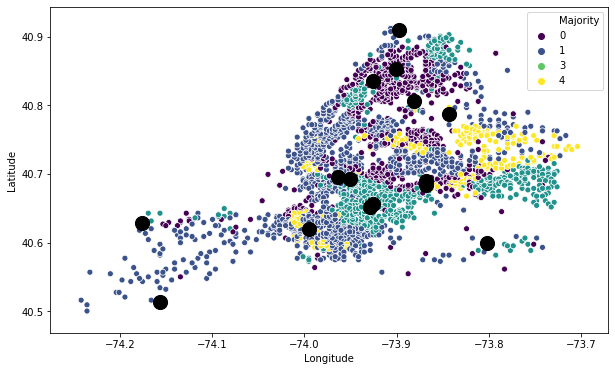

In [152]:
plt.figure(figsize = (10,6))
sea.scatterplot(x = "Longitude", y = "Latitude", data = census, hue = "Majority", palette = "viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200);
plt.legend()



In [153]:
def greedy_lambda(F, F_distances, lamb):
    removed = []
    Fcopy1 = F.copy()
    for i in F:
        if i not in removed:
            for j in F:
                if j not in removed:
                    if (i == j):
                        pass
                    elif (F_distances[i,j] < 2*lamb):
                        #print(F_distances[i,j])
                        Fcopy1.remove(j)
                        removed.append(j)
    return Fcopy1

In [38]:
dist = np.ones((n,n))*10000
for i in F:
    for j in F:
        if i != j:
            dist[i,j] = distances[i,j]

In [166]:
F_prime = greedy_lambda(F,distances,.45)

In [167]:
F_prime

[60]

In [177]:
F_prime = F

In [168]:
dist1 = np.ones((n,n))*100000
for i in F:
    for j in F_prime:
        if i != j:
            dist1[i,j] = distances[i,j]

In [178]:
d = {}

for f in F:
    if f in F_prime: 
        if f in d:
            d[f].append(f)
        else:
            d[f] = []
            d[f].append(f)
    else:
        seen = 0
        for i in F_prime:
            if seen == 0 and dist1[f,i] == min(dist1[f]):
            #if dist1[f,i] < 20:
                if i in d:
                    d[i].append(f)
                else:
                    d[i] = []
                    d[i].append(f)
                seen = 1


In [179]:
seen = set()
total = 0
x_new = np.zeros((n,n))
for j in range(n):
    for i in F_prime:
        for element in d[i]:
            seen.add(element)
            x_new[i,j] += X_sol[element,j]
            total += X_sol[element,j]
total

2167.0

In [180]:
dict_enum = {}
num = 2167
for i in F_prime:
    for c in np.arange(len(C)):
        dict_enum[(i,c)] = num
        num += 1

ind = len(F_prime)* 5 + 2167
dict_enum['s'] = ind
dict_enum['t'] = ind+1

In [181]:
start_nodes = []
end_nodes = []
capacity = []

for j in range(n):
    start_nodes.append(int(ind))
    end_nodes.append(int(j))
    capacity.append(int(1))

arcindex = n
dict_arcs = {}

for color in range(len(C)):
    for index in C[color]:
        for i in F_prime:
            if x_new[i,index] > 0:
                start_nodes.append(int(index))
                dictind = dict_enum[(i,color)]
                end_nodes.append(int(dictind))
                capacity.append(int(1))
                dict_arcs[arcindex] = (index,(i,color))
                arcindex += 1
                
for i in F_prime:
    for color in range(len(C)):
        val = 0
        for index in C[color]:
            val += x_new[i,index]
        val = np.ceil(val)
        dictind = dict_enum[(i,color)]
        start_nodes.append(int(dictind))
        end_nodes.append(int(i))
        capacity.append(int(val))

for i in F_prime:
    val = 0
    for j in range(n):
        val += x_new[i,j]
    val = np.ceil(val)
    start_nodes.append(int(i))
    end_nodes.append(int(ind+1))
    capacity.append(int(val))


max_flow = pywrapgraph.SimpleMaxFlow()
for index in range(0, len(start_nodes)):
    max_flow.AddArcWithCapacity(start_nodes[index], end_nodes[index], capacity[index])

    
new_x1 = np.zeros((n,n))
if max_flow.Solve(ind, ind+1) == max_flow.OPTIMAL:
    for index in np.arange(n,arcindex):
        if max_flow.Flow(int(index)) > 0:
            j = dict_arcs[index][0]
            i = dict_arcs[index][1][0]
            col = dict_arcs[index][1][1]
            new_x1[i,j] = 1

In [182]:
eeee = 0
suma = {}
for i in F_prime:
    suma[i] = 0
    new_x1[i,i] = 1
    for j in range(n):
        suma[i]+= new_x1[i,j]
suma
sum(suma.values())

2167.0

In [175]:
suma

{60: 2167.0}

In [183]:
listforc = {}
seen = []
for i in range(n):
    if sum(new_x1[i]) > 0:
        listforc[i] = [i]
        for j in range(n):
            if new_x1[i,j] > 0:
                listforc[i].append(j)
                seen.append(j)

In [184]:
dists = []
other = []
for i in listforc:
    for j in listforc[i]:
        dists.append(distances[i,j])
        other.append((i,j))
max(dists)
#for all distances, what was the maximum distance

0.44915286038328217

In [163]:
np.argmax(dists)

2155

In [164]:
other[2173]

(2166, 1623)

In [165]:
distances[2166,1945]

0.4943218149298277

In [108]:
np.argmax(dists)
distances[60,2147]

0.4771097423082025

In [109]:
max(distances[60])

0.4771097423082025

In [49]:
census

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,LatLong,Latitude,Longitude,Majority
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,0,NaN,NaN,NaN,NaN,NaN,"(-73.8747738693, 40.7920603015)",40.792060,-73.874774,2
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2308,80.8,16.2,2.9,0.0,7.7,"(-73.85894472359999, 40.8011055276)",40.801106,-73.858945,0
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,2675,71.7,25.3,2.5,0.6,9.5,"(-73.84944723619998, 40.8056281407)",40.805628,-73.849447,0
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,2120,75.0,21.3,3.8,0.0,8.7,"(-73.85577889449999, 40.8169346734)",40.816935,-73.855779,0
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,1083,76.8,15.5,7.7,0.0,19.2,"(-73.8937688442, 40.8011055276)",40.801106,-73.893769,0
5,36005002000,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,...,2508,71.0,21.3,7.7,0.0,17.2,"(-73.8684422111, 40.8169346734)",40.816935,-73.868442,0
6,36005002300,Bronx,Bronx,4774,2130,2644,62.3,0.2,36.5,1.0,...,1191,74.2,16.1,9.7,0.0,18.9,"(-73.92542713569999, 40.8101507538)",40.810151,-73.925427,0
7,36005002400,Bronx,Bronx,150,109,41,0.0,52.0,48.0,0.0,...,113,62.8,37.2,0.0,0.0,0.0,"(-73.8684422111, 40.8101507538)",40.810151,-73.868442,1
8,36005002500,Bronx,Bronx,5355,2338,3017,76.5,1.5,18.9,0.0,...,1691,85.1,8.3,6.1,0.5,9.4,"(-73.91909547739999, 40.8056281407)",40.805628,-73.919095,0
9,36005002701,Bronx,Bronx,3016,1375,1641,68.0,0.0,31.2,0.0,...,1102,86.9,8.5,4.5,0.0,15.2,"(-73.91592964819999, 40.8056281407)",40.805628,-73.915930,0


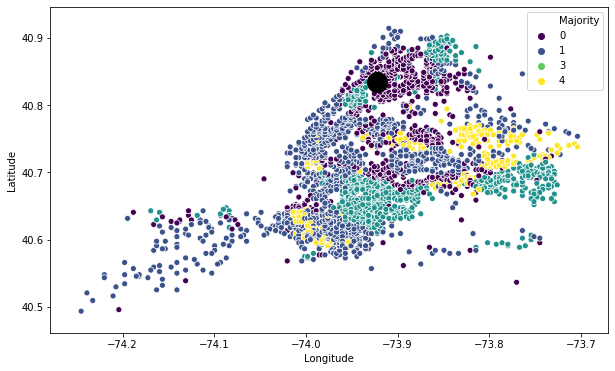

In [50]:
center = X[120]
plt.figure(figsize = (10,6))
sea.scatterplot(x = "Longitude", y = "Latitude", data = census, hue = "Majority", palette = "viridis")
plt.scatter(center[0], center[1], c="black", s=400);
plt.legend()

